# Generate a Histogram Based Noise Model
We will use pairs of noisy observations $x_i$ and clean signal $s_i$ (created by averaging many noisy images) to estimate the conditional distribution $p(x_i|s_i)$.
Note that this noise model is independent of the image content. It is a property of the camera and imaging conditions. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import pn2v.utils
import pn2v.histNoiseModel
from tifffile import imread

### Download the data

In [2]:
# Download data
import os
import urllib
import zipfile
os.system("rm -r data")
if not os.path.isdir('./data'):
    os.mkdir('./data')

zipPath="data/Convallaria.zip"
if not os.path.exists(zipPath):
    
    data = urllib.request.urlretrieve('https://cloud.mpi-cbg.de/index.php/s/l3FOUisQzvtXBW8/download', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("data")

### Load data
Note that we are using a higher laser power image (1pc) compared to to image we will use for testing (0.5pc). We can do this because the noise model is a property of the camera alone.
A higher laser power will affect the signal $s_i$ (making it brighter) but not the noise distribution $p(x_i|s_i)$

In [3]:
path="data/Convallaria/"

observation=observation = imread(path+'20190520_tl_25um_50msec_1pc_488_130EM_Conv.tif')

# The data contains 100 images of a static sample.
# We estimate the clean signal by averaging all images.
signal=np.mean(observation[:,...],axis=0)[np.newaxis,...]

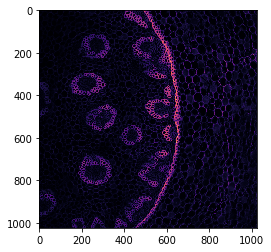

In [4]:
# Let's look at an image
plt.imshow(signal[0],cmap='magma')

### Create Histogram
We are now creating a 2D histogram. Rows correspond to different signals $s_i$ and columns to different observations $x_i$. The histogram is normalized so that every row sums to one. It describes the distribution $p(x_i|s_i)$ for each $s_i$.

In [5]:
# We are creating the histogram.
# This can take a minute.
minVal, maxVal =350, 6500
bins = 256

histogram = pn2v.histNoiseModel.createHistogram(bins,minVal,maxVal,observation,signal)

# Saving histogram to disc.
np.save(path+'noiseModel.npy', histogram)

histogram=histogram[0]

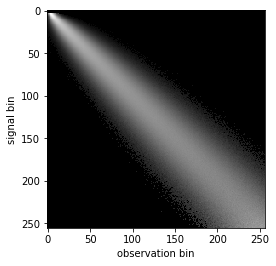

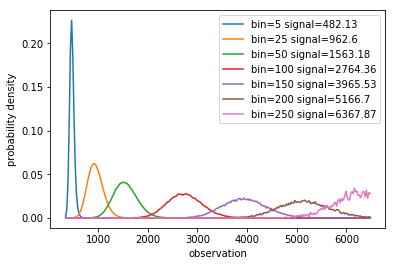

In [7]:
# Let's look at the noise model
plt.xlabel('observation bin')
plt.ylabel('signal bin')
plt.imshow(histogram**0.25, cmap='gray')
plt.show()

xvals=np.arange(bins)/float(bins)*(maxVal-minVal)+minVal
plt.xlabel('observation')
plt.ylabel('probability density')

# We will now look at the noise distributions for different signals s_i,
# by plotting individual rows of the histogram
index=5
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

index=25
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

index=50
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

index=100
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

index=150
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

index=200
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

index=250
s=((index+0.5)/float(bins)*(maxVal-minVal)+minVal)
plt.plot(xvals,histogram[index,:], label='bin='+str(index)+' signal='+str(np.round(s,2)))

plt.legend()
plt.show()